# Show_OLP_data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

import package_DBR
from package_DBR import myRound, FOPDT, SOPDT, Process, Bode

# Load data

In [9]:
Directory = 'Data/'

nameFile = 'Open_loop_experiment_on_MV_2023-03-14-09h22.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(Directory + nameFile)

t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

# Plot loaded data

(45.0, 55.0)

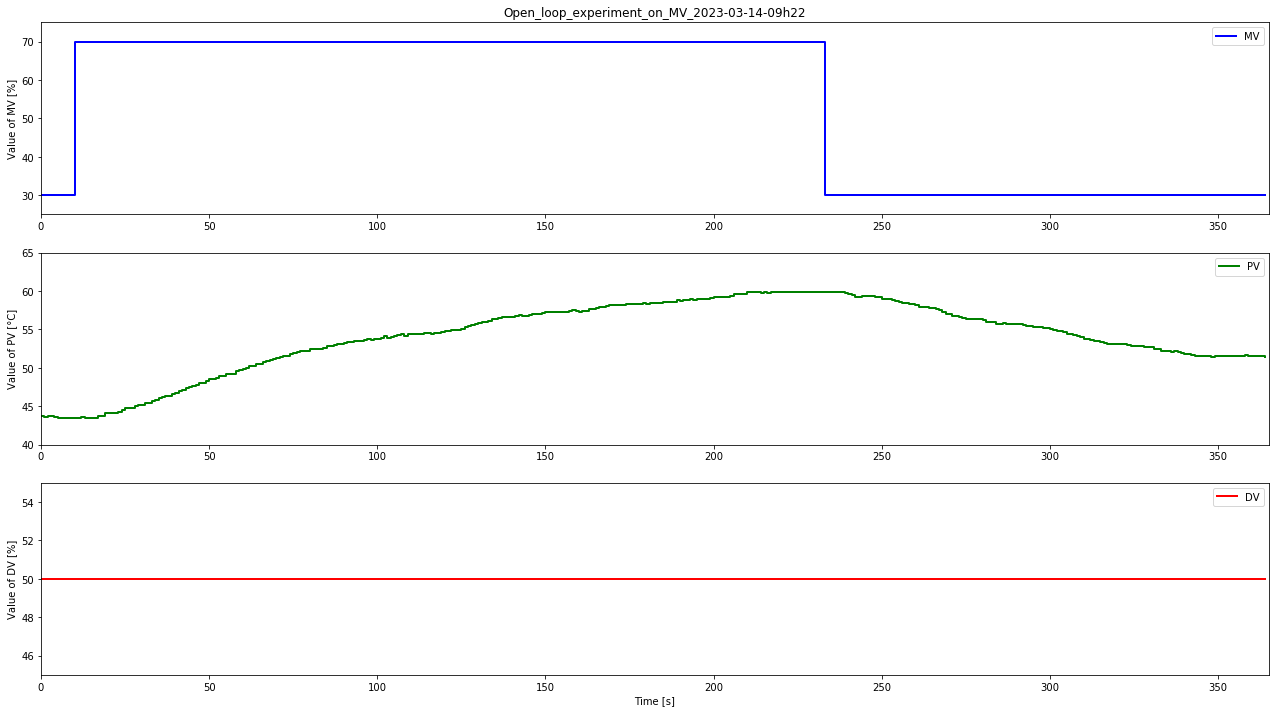

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

# if not os.path.exists('Plots'):
#     os.makedirs('Plots')

# plt.savefig('Plots\\' + titleName + '.png',transparent=True)
# plt.savefig('Plots\\' + titleName + '.pdf',transparent=True) 

# Clean data

In [11]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

# Plot cleaned data

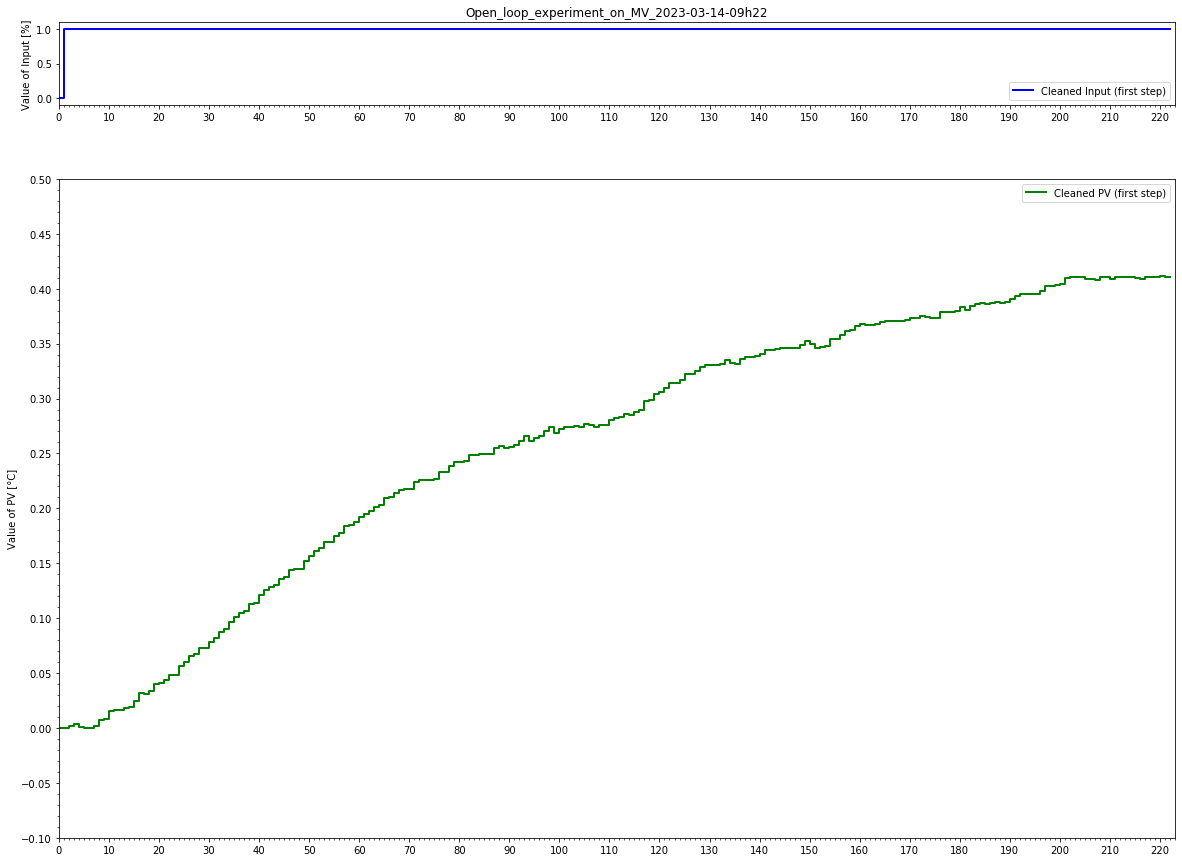

In [12]:
if ExpVariable == 'MV':
    Input = MVm
else:
    Input = DVm
    
DInput = np.diff(Input)
Index = np.where(np.diff(Input) != 0)[0]

Input = Input[0:Index[-1]]
Output = PVm[0:Index[-1]]
t = tm[0:Index[-1]]

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 8]})
fig.set_figheight(15)
fig.set_figwidth(20)

l1, = ax1.step([0,1],[0,1],'b-',linewidth=2,label='Cleaned Input (first step)',where='post')
ax1.set_ylabel('Value of Input [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(t,Input)
ax1.set_ylim(myRound(np.min(Input),1)-0.1, myRound(np.max(Input),1)+0.1)  

l2, = ax2.step([0,1],[0,1],'g-',linewidth=2,label='Cleaned PV (first step)',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(t,Output)
ax2.set_ylim(myRound(np.min(Output),0.1)-0.1, myRound(np.max(Output),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Axis minor and major ticks
multiplier = 10
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_major_locator(locator)    
ax2.xaxis.set_major_locator(locator)

multiplier = 1
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_minor_locator(locator)    
ax2.xaxis.set_minor_locator(locator)    
    
multiplier = 0.05
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_major_locator(locator)
    
multiplier = 0.01
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_minor_locator(locator)

if not os.path.exists('Plots'):
    os.makedirs('Plots')

plt.savefig('Plots\Graphical_methods_' + titleName + '.png',transparent=True)
plt.savefig('Plots\Graphical_methods_' + titleName + '.pdf',transparent=True) 

# Parameters optimal FOPDT & SOPDT models

In [13]:
Kp_FOPDTOPT =  0.5508001418305712
T_FOPDTOPT =  144.66340782080437
theta_FOPDTOPT = 3.052784376719262

Kp_SOPDTOPT = 0.519824867356309
T1_SOPDTOPT = 130.72860133396208
T2_SOPDTOPT = 5.242159493885901e-07
theta_SOPDTOPT = 6.12502244580564

Ts = 1
#Détermination Graphiques
Tu=13
Tg=97
T1=39
T2=53
alpha=0.14
Kp=0.43
#Broida 1
T_broida1=Tg
theta_broida1=Tu
#Broida 2
T_broida2=5.5*(T2-T1)
theta_broida2=2.8*T1-1.8*T2
#Van der Grinten
T1_vdg=Tg*((3*alpha*math.exp(1)-1)/1+alpha*math.exp(1))
T2_vdg=Tg*((1-alpha*math.exp(1))/1+alpha*math.exp(1))
theta_vdg=Tu-(T1*T2/(T1+3*T2))
#Strejc
an=0.13
bn=2.72
T_strejc=Tg/bn
T_uth=an*Tg
theta_strejc=Tu-T_uth

# Compare step responses (experiment compared with optimal FOPDT & SOPDT)

(0, 355.0)

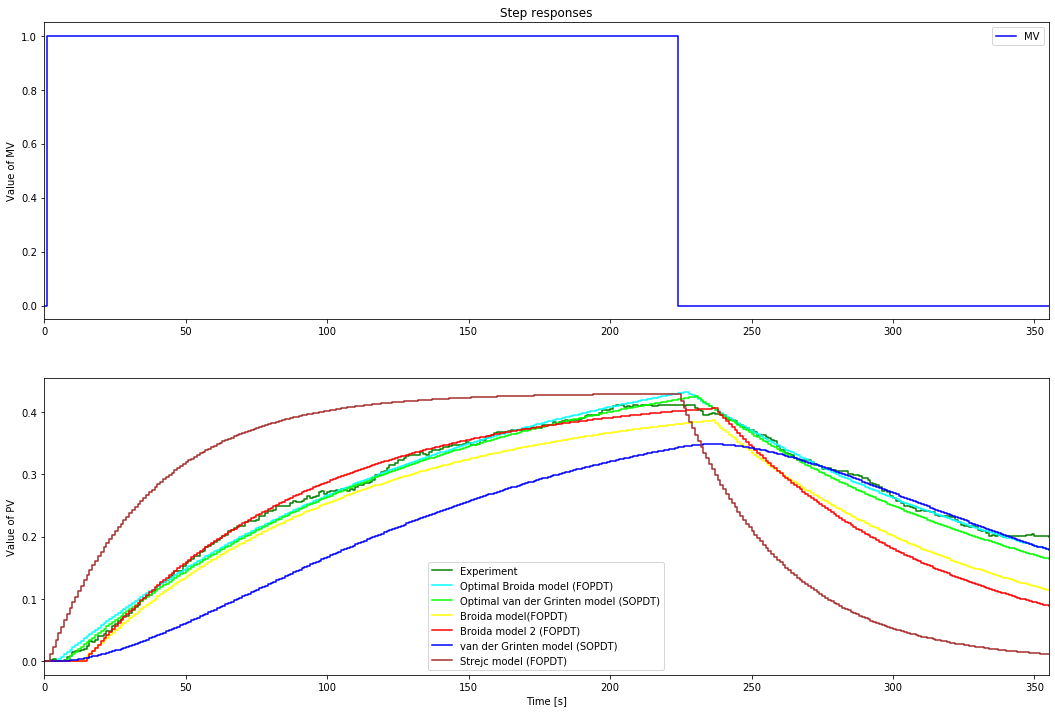

In [14]:
PV_SOPDTOPT = SOPDT(MVm,Kp_SOPDTOPT,T1_SOPDTOPT,T2_SOPDTOPT,theta_SOPDTOPT,Ts)
PV_FOPDTOPT = FOPDT(MVm,Kp_FOPDTOPT,T_FOPDTOPT,theta_FOPDTOPT,Ts)
PV_Broida1=FOPDT(MVm,Kp,T_broida1,theta_broida1,Ts)
PV_Broida2=FOPDT(MVm,Kp,T_broida2,theta_broida2,Ts)
PV_VDG=SOPDT(MVm,Kp,T1_vdg,T2_vdg,theta_vdg,Ts)
PV_Strejc=FOPDT(MVm,Kp,T_strejc,theta_strejc,Ts)

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
plt.step(tm,MVm,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step responses')
plt.legend(loc='best')
plt.xlim([0, np.max(tm)])   

plt.subplot(2,1,2)
plt.step(tm,PVm,'g-',label='Experiment',where='post')
plt.step(tm,PV_FOPDTOPT,'cyan',label='Optimal Broida model (FOPDT)',where='post')
plt.step(tm,PV_SOPDTOPT,'lime',label='Optimal van der Grinten model (SOPDT)',where='post')
plt.step(tm,PV_Broida1,'yellow',label='Broida model(FOPDT)',where='post')
plt.step(tm,PV_Broida2,'red',label='Broida model 2 (FOPDT)',where='post')
plt.step(tm,PV_VDG,'blue',label='van der Grinten model (SOPDT)',where='post')
plt.step(tm,PV_Strejc,'brown',label='Strejc model (FOPDT)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')  
plt.xlim([0, np.max(tm)])

# Compare Bode diagrams (optimal FOPDT & SOPDT)

Text(0, 0.5, 'Phase [°]')

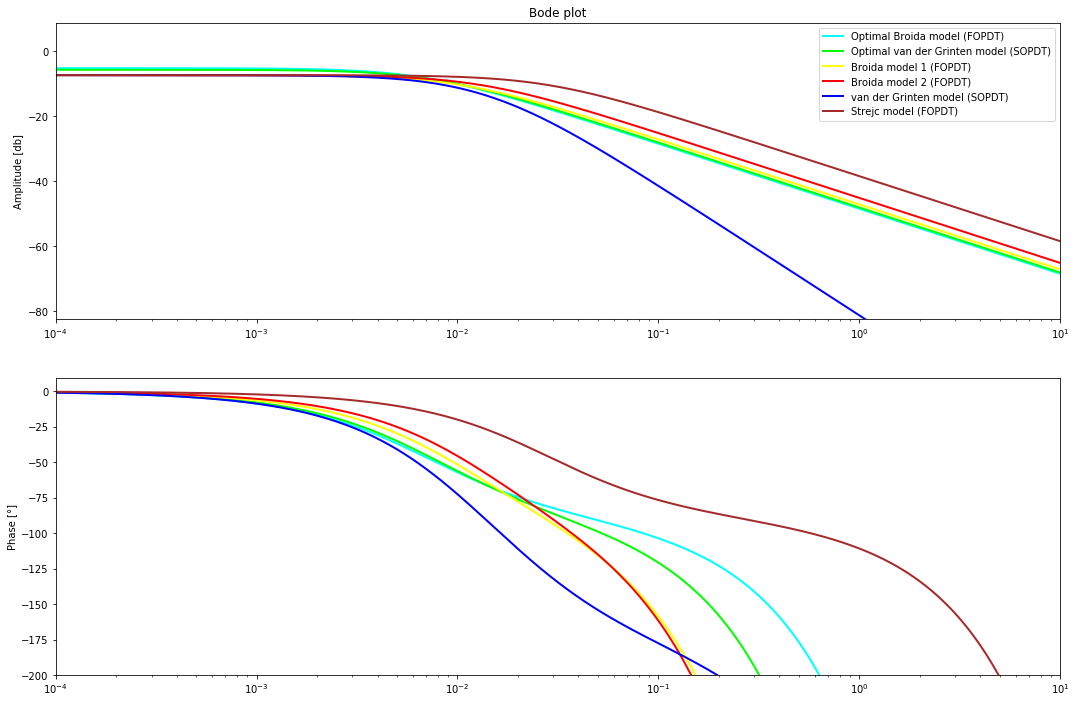

In [15]:
# Frequency response
P_FOPDTOPT = Process({})
P_FOPDTOPT.parameters['Kp'] = Kp_FOPDTOPT
P_FOPDTOPT.parameters['Tlag1'] = T_FOPDTOPT
P_FOPDTOPT.parameters['theta'] = theta_FOPDTOPT

# Frequency response
P_SOPDTOPT = Process({})
P_SOPDTOPT.parameters['Kp'] = Kp_SOPDTOPT
P_SOPDTOPT.parameters['Tlag1'] = T1_SOPDTOPT
P_SOPDTOPT.parameters['Tlag2'] = T2_SOPDTOPT
P_SOPDTOPT.parameters['theta'] = theta_SOPDTOPT

# Frequency response Broida 1
P_BROIDA1 = Process({})
P_BROIDA1 = Process({})
P_BROIDA1.parameters['Kp'] = Kp
P_BROIDA1.parameters['Tlag1'] = T_broida1
P_BROIDA1.parameters['theta'] = theta_broida1

# Frequency response Broida 2
P_BROIDA2 = Process({})
P_BROIDA2.parameters['Kp'] = Kp
P_BROIDA2.parameters['Tlag1'] = T_broida2
P_BROIDA2.parameters['theta'] = theta_broida2

# Frequency response Vander Grinen
P_VDG = Process({})
P_VDG.parameters['Kp'] = Kp
P_VDG.parameters['Tlag1'] = T1_vdg
P_VDG.parameters['Tlag2'] = T2_vdg
P_VDG.parameters['theta'] = theta_vdg

# Frequency response Strejc
P_STREJC = Process({})
P_STREJC.parameters['Kp'] = Kp
P_STREJC.parameters['Tlag1'] = T_strejc
P_STREJC.parameters['theta'] = theta_strejc

omega = np.logspace(-4, 1, 10000)
Ps_FOPDTOPT = Bode(P_FOPDTOPT,omega,Show=False) # Optimal Broida
Ps_SOPDTOPT = Bode(P_SOPDTOPT,omega,Show=False) # Optimal van der Grinten
Ps_broida1= Bode(P_BROIDA1,omega,Show=False) #Broida 1
Ps_broida2= Bode(P_BROIDA2,omega,Show=False) #Broida 2
Ps_VDG = Bode(P_VDG,omega,Show=False) #van der Grinten
Ps_strejc= Bode(P_STREJC,omega,Show=False) #Strejc

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_FOPDTOPT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_FOPDTOPT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDTOPT)),'cyan',linewidth=2,label='Optimal Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SOPDTOPT)),'lime',linewidth=2,label='Optimal van der Grinten model (SOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_broida1)),'yellow',linewidth=2,label='Broida model 1 (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_broida2)),'red',linewidth=2,label='Broida model 2 (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_VDG)),'blue',linewidth=2,label='van der Grinten model (SOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_strejc)),'brown',linewidth=2,label='Strejc model (FOPDT)')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('Bode plot')
plt.legend(loc='best')

plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPDTOPT)),'lime',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_broida1)),'yellow',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_broida2)),'red',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_VDG)),'blue',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_strejc)),'brown',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')